In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh

In [2]:
#importing F1 csv source files; Races(2017-2021), Drivers,Drivers Standings,, Constructors (teams), Results
all_races = pd.read_csv("races.csv")
all_drivers = pd.read_csv("drivers.csv")
all_constructors = pd.read_csv("constructors.csv")
all_status = pd.read_csv("status.csv")
all_results = pd.read_csv("results.csv")
all_circuits = pd.read_csv("circuits.csv")

In [3]:
#In this step im only using columns that i want, once i complete i will complete a merge to form a master data set. Then i can remove duplicates & start grouping
races = all_races[['raceId', 'year', 'circuitId','name']]
drivers = all_drivers[['driverId','driverRef', 'surname','forename','nationality']]
constructors = all_constructors[['constructorId','constructorRef','nationality']]
status = all_status[['statusId','status']]
results = all_results
circuits = all_circuits[['circuitId', 'location','country','lat','lng']]

In [4]:
#In order to use years 2017 - 2021 i must merge results & races dataset, this is because the date lies in the races dataset.
results_races = results.merge(races)
results_races = results_races[['resultId','driverId','constructorId','positionText','points','statusId','year','circuitId','name']]
results_races

,resultId,driverId,constructorId,positionText,points,statusId,year,circuitId,name
0,1,1,1,1,10.0,1,2008,1,Australian Grand Prix
1,2,2,2,2,8.0,1,2008,1,Australian Grand Prix
2,3,3,3,3,6.0,1,2008,1,Australian Grand Prix
3,4,4,4,4,5.0,1,2008,1,Australian Grand Prix
4,5,5,1,5,4.0,1,2008,1,Australian Grand Prix
...,...,...,...,...,...,...,...,...,...
25455,25461,849,3,16,0.0,11,2022,1,Australian Grand Prix
25456,25462,4,214,17,0.0,11,2022,1,Australian Grand Prix
25457,25463,830,9,R,0.0,9,2022,1,Australian Grand Prix
25458,25464,20,117,R,0.0,3,2022,1,Australian Grand Prix


In [5]:
#Using the below i am filtering for races between 2017 & 2022
cleaned_results = results_races[(results_races['year'] >= 2017) & (results_races['year'] < 2022)]
cleaned_results

,resultId,driverId,constructorId,positionText,points,statusId,year,circuitId,name
23380,23379,20,6,1,25.0,1,2017,1,Australian Grand Prix
23381,23380,1,131,2,18.0,1,2017,1,Australian Grand Prix
23382,23381,822,131,3,15.0,1,2017,1,Australian Grand Prix
23383,23382,8,6,4,12.0,1,2017,1,Australian Grand Prix
23384,23383,830,9,5,10.0,1,2017,1,Australian Grand Prix
...,...,...,...,...,...,...,...,...,...
25395,25401,849,3,R,0.0,3,2021,24,Abu Dhabi Grand Prix
25396,25402,841,51,R,0.0,6,2021,24,Abu Dhabi Grand Prix
25397,25403,847,3,R,0.0,6,2021,24,Abu Dhabi Grand Prix
25398,25404,8,51,R,0.0,23,2021,24,Abu Dhabi Grand Prix


In [6]:
#Merging master cleaned_results & drivers to bring drivers name, surname, forename & nationality into master table
cleaned_results = cleaned_results.merge(drivers)
cleaned_results

,resultId,driverId,constructorId,positionText,points,statusId,year,circuitId,name,driverRef,surname,forename,nationality
0,23379,20,6,1,25.0,1,2017,1,Australian Grand Prix,vettel,Vettel,Sebastian,German
1,23400,20,6,2,18.0,1,2017,17,Chinese Grand Prix,vettel,Vettel,Sebastian,German
2,23419,20,6,1,25.0,1,2017,3,Bahrain Grand Prix,vettel,Vettel,Sebastian,German
3,23440,20,6,2,18.0,1,2017,71,Russian Grand Prix,vettel,Vettel,Sebastian,German
4,23460,20,6,2,18.0,1,2017,4,Spanish Grand Prix,vettel,Vettel,Sebastian,German
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,25323,853,210,18,0.0,13,2021,32,Mexico City Grand Prix,mazepin,Mazepin,Nikita,Russian
2016,25342,853,210,17,0.0,12,2021,18,São Paulo Grand Prix,mazepin,Mazepin,Nikita,Russian
2017,25363,853,210,18,0.0,12,2021,78,Qatar Grand Prix,mazepin,Mazepin,Nikita,Russian
2018,25383,853,210,R,0.0,4,2021,77,Saudi Arabian Grand Prix,mazepin,Mazepin,Nikita,Russian


In [7]:
#Merging master cleaned_results & constructors  to bring team name & nationality into master table
cleaned_results = cleaned_results.merge(constructors, on = "constructorId")
cleaned_results

,resultId,driverId,constructorId,positionText,points,statusId,year,circuitId,name,driverRef,surname,forename,nationality_x,constructorRef,nationality_y
0,23379,20,6,1,25.0,1,2017,1,Australian Grand Prix,vettel,Vettel,Sebastian,German,ferrari,Italian
1,23400,20,6,2,18.0,1,2017,17,Chinese Grand Prix,vettel,Vettel,Sebastian,German,ferrari,Italian
2,23419,20,6,1,25.0,1,2017,3,Bahrain Grand Prix,vettel,Vettel,Sebastian,German,ferrari,Italian
3,23440,20,6,2,18.0,1,2017,71,Russian Grand Prix,vettel,Vettel,Sebastian,German,ferrari,Italian
4,23460,20,6,2,18.0,1,2017,4,Spanish Grand Prix,vettel,Vettel,Sebastian,German,ferrari,Italian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,25323,853,210,18,0.0,13,2021,32,Mexico City Grand Prix,mazepin,Mazepin,Nikita,Russian,haas,American
2016,25342,853,210,17,0.0,12,2021,18,São Paulo Grand Prix,mazepin,Mazepin,Nikita,Russian,haas,American
2017,25363,853,210,18,0.0,12,2021,78,Qatar Grand Prix,mazepin,Mazepin,Nikita,Russian,haas,American
2018,25383,853,210,R,0.0,4,2021,77,Saudi Arabian Grand Prix,mazepin,Mazepin,Nikita,Russian,haas,American


In [8]:
#Merging master cleaned_results & status  to bring racing finish status into master.
cleaned_results = cleaned_results.merge(status)
cleaned_results

,resultId,driverId,constructorId,positionText,points,statusId,year,circuitId,name,driverRef,surname,forename,nationality_x,constructorRef,nationality_y,status
0,23379,20,6,1,25.0,1,2017,1,Australian Grand Prix,vettel,Vettel,Sebastian,German,ferrari,Italian,Finished
1,23400,20,6,2,18.0,1,2017,17,Chinese Grand Prix,vettel,Vettel,Sebastian,German,ferrari,Italian,Finished
2,23419,20,6,1,25.0,1,2017,3,Bahrain Grand Prix,vettel,Vettel,Sebastian,German,ferrari,Italian,Finished
3,23440,20,6,2,18.0,1,2017,71,Russian Grand Prix,vettel,Vettel,Sebastian,German,ferrari,Italian,Finished
4,23460,20,6,2,18.0,1,2017,4,Spanish Grand Prix,vettel,Vettel,Sebastian,German,ferrari,Italian,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,23800,828,15,R,0.0,38,2018,1,Australian Grand Prix,ericsson,Ericsson,Marcus,Swedish,sauber,Swiss,Steering
2016,23981,844,15,R,0.0,27,2018,9,British Grand Prix,leclerc,Leclerc,Charles,Monegasque,sauber,Swiss,Tyre
2017,24883,825,210,R,0.0,139,2020,21,Emilia Romagna Grand Prix,kevin_magnussen,Magnussen,Kevin,Danish,haas,American,Illness
2018,25405,853,210,W,0.0,139,2021,24,Abu Dhabi Grand Prix,mazepin,Mazepin,Nikita,Russian,haas,American,Illness


In [9]:
#Merging master cleaned_results & circuits  to bring circuit country into master
cleaned_results = cleaned_results.merge(circuits)
cleaned_results

,resultId,driverId,constructorId,positionText,points,statusId,year,circuitId,name,driverRef,surname,forename,nationality_x,constructorRef,nationality_y,status,location,country,lat,lng
0,23379,20,6,1,25.0,1,2017,1,Australian Grand Prix,vettel,Vettel,Sebastian,German,ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.96800
1,23782,20,6,1,25.0,1,2018,1,Australian Grand Prix,vettel,Vettel,Sebastian,German,ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.96800
2,24206,20,6,4,12.0,1,2019,1,Australian Grand Prix,vettel,Vettel,Sebastian,German,ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.96800
3,23382,8,6,4,12.0,1,2017,1,Australian Grand Prix,raikkonen,Räikkönen,Kimi,Finnish,ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.96800
4,23784,8,6,3,15.0,1,2018,1,Australian Grand Prix,raikkonen,Räikkönen,Kimi,Finnish,ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.96800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,25220,9,51,15,0.0,12,2021,39,Dutch Grand Prix,kubica,Kubica,Robert,Polish,alfa,Swiss,+2 Laps,Zandvoort,Netherlands,52.3888,4.54092
2016,25221,849,3,16,0.0,12,2021,39,Dutch Grand Prix,latifi,Latifi,Nicholas,Canadian,williams,British,+2 Laps,Zandvoort,Netherlands,52.3888,4.54092
2017,25224,852,213,R,0.0,131,2021,39,Dutch Grand Prix,tsunoda,Tsunoda,Yuki,Japanese,alphatauri,Italian,Power Unit,Zandvoort,Netherlands,52.3888,4.54092
2018,25225,853,210,R,0.0,9,2021,39,Dutch Grand Prix,mazepin,Mazepin,Nikita,Russian,haas,American,Hydraulics,Zandvoort,Netherlands,52.3888,4.54092


In [10]:
#Checking for missing Values
missing_values_count = cleaned_results.isnull().sum()
missing_values_count

resultId          0
driverId          0
constructorId     0
positionText      0
points            0
statusId          0
year              0
circuitId         0
name              0
driverRef         0
surname           0
forename          0
nationality_x     0
constructorRef    0
nationality_y     0
status            0
location          0
country           0
lat               0
lng               0
dtype: int64

In [11]:
#Fill all missing values with 0
cleaned_data = cleaned_results.fillna(0)
cleaned_data

,resultId,driverId,constructorId,positionText,points,statusId,year,circuitId,name,driverRef,surname,forename,nationality_x,constructorRef,nationality_y,status,location,country,lat,lng
0,23379,20,6,1,25.0,1,2017,1,Australian Grand Prix,vettel,Vettel,Sebastian,German,ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.96800
1,23782,20,6,1,25.0,1,2018,1,Australian Grand Prix,vettel,Vettel,Sebastian,German,ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.96800
2,24206,20,6,4,12.0,1,2019,1,Australian Grand Prix,vettel,Vettel,Sebastian,German,ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.96800
3,23382,8,6,4,12.0,1,2017,1,Australian Grand Prix,raikkonen,Räikkönen,Kimi,Finnish,ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.96800
4,23784,8,6,3,15.0,1,2018,1,Australian Grand Prix,raikkonen,Räikkönen,Kimi,Finnish,ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.96800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,25220,9,51,15,0.0,12,2021,39,Dutch Grand Prix,kubica,Kubica,Robert,Polish,alfa,Swiss,+2 Laps,Zandvoort,Netherlands,52.3888,4.54092
2016,25221,849,3,16,0.0,12,2021,39,Dutch Grand Prix,latifi,Latifi,Nicholas,Canadian,williams,British,+2 Laps,Zandvoort,Netherlands,52.3888,4.54092
2017,25224,852,213,R,0.0,131,2021,39,Dutch Grand Prix,tsunoda,Tsunoda,Yuki,Japanese,alphatauri,Italian,Power Unit,Zandvoort,Netherlands,52.3888,4.54092
2018,25225,853,210,R,0.0,9,2021,39,Dutch Grand Prix,mazepin,Mazepin,Nikita,Russian,haas,American,Hydraulics,Zandvoort,Netherlands,52.3888,4.54092


In [12]:
#renaming my source to master_data
master_data = cleaned_results
master_data.head()

,resultId,driverId,constructorId,positionText,points,statusId,year,circuitId,name,driverRef,surname,forename,nationality_x,constructorRef,nationality_y,status,location,country,lat,lng
0,23379,20,6,1,25.0,1,2017,1,Australian Grand Prix,vettel,Vettel,Sebastian,German,ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.968
1,23782,20,6,1,25.0,1,2018,1,Australian Grand Prix,vettel,Vettel,Sebastian,German,ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.968
2,24206,20,6,4,12.0,1,2019,1,Australian Grand Prix,vettel,Vettel,Sebastian,German,ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.968
3,23382,8,6,4,12.0,1,2017,1,Australian Grand Prix,raikkonen,Räikkönen,Kimi,Finnish,ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.968
4,23784,8,6,3,15.0,1,2018,1,Australian Grand Prix,raikkonen,Räikkönen,Kimi,Finnish,ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.968


In [13]:
#next i want to combine forname & surname to give me driver_name_full
master_data['driver_name_full'] = master_data['forename']+ [' ']+ master_data['surname']
master_data.head()

,resultId,driverId,constructorId,positionText,points,statusId,year,circuitId,name,driverRef,...,forename,nationality_x,constructorRef,nationality_y,status,location,country,lat,lng,driver_name_full
0,23379,20,6,1,25.0,1,2017,1,Australian Grand Prix,vettel,...,Sebastian,German,ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.968,Sebastian Vettel
1,23782,20,6,1,25.0,1,2018,1,Australian Grand Prix,vettel,...,Sebastian,German,ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.968,Sebastian Vettel
2,24206,20,6,4,12.0,1,2019,1,Australian Grand Prix,vettel,...,Sebastian,German,ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.968,Sebastian Vettel
3,23382,8,6,4,12.0,1,2017,1,Australian Grand Prix,raikkonen,...,Kimi,Finnish,ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.968,Kimi Räikkönen
4,23784,8,6,3,15.0,1,2018,1,Australian Grand Prix,raikkonen,...,Kimi,Finnish,ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.968,Kimi Räikkönen


In [14]:
#Capitalzing constructor name
master_data['constructorRef'] = master_data['constructorRef'].str.capitalize()
master_data

,resultId,driverId,constructorId,positionText,points,statusId,year,circuitId,name,driverRef,...,forename,nationality_x,constructorRef,nationality_y,status,location,country,lat,lng,driver_name_full
0,23379,20,6,1,25.0,1,2017,1,Australian Grand Prix,vettel,...,Sebastian,German,Ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.96800,Sebastian Vettel
1,23782,20,6,1,25.0,1,2018,1,Australian Grand Prix,vettel,...,Sebastian,German,Ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.96800,Sebastian Vettel
2,24206,20,6,4,12.0,1,2019,1,Australian Grand Prix,vettel,...,Sebastian,German,Ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.96800,Sebastian Vettel
3,23382,8,6,4,12.0,1,2017,1,Australian Grand Prix,raikkonen,...,Kimi,Finnish,Ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.96800,Kimi Räikkönen
4,23784,8,6,3,15.0,1,2018,1,Australian Grand Prix,raikkonen,...,Kimi,Finnish,Ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.96800,Kimi Räikkönen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,25220,9,51,15,0.0,12,2021,39,Dutch Grand Prix,kubica,...,Robert,Polish,Alfa,Swiss,+2 Laps,Zandvoort,Netherlands,52.3888,4.54092,Robert Kubica
2016,25221,849,3,16,0.0,12,2021,39,Dutch Grand Prix,latifi,...,Nicholas,Canadian,Williams,British,+2 Laps,Zandvoort,Netherlands,52.3888,4.54092,Nicholas Latifi
2017,25224,852,213,R,0.0,131,2021,39,Dutch Grand Prix,tsunoda,...,Yuki,Japanese,Alphatauri,Italian,Power Unit,Zandvoort,Netherlands,52.3888,4.54092,Yuki Tsunoda
2018,25225,853,210,R,0.0,9,2021,39,Dutch Grand Prix,mazepin,...,Nikita,Russian,Haas,American,Hydraulics,Zandvoort,Netherlands,52.3888,4.54092,Nikita Mazepin


In [15]:
#Created a function to add whether a driver achieved a podium finish. =>15 points is a podium finish
master_data.loc[master_data['points']>=15,"podium"] = 'Yes'
master_data.loc[master_data['points']<15,"podium"] = 'No'
master_data.head()

,resultId,driverId,constructorId,positionText,points,statusId,year,circuitId,name,driverRef,...,nationality_x,constructorRef,nationality_y,status,location,country,lat,lng,driver_name_full,podium
0,23379,20,6,1,25.0,1,2017,1,Australian Grand Prix,vettel,...,German,Ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.968,Sebastian Vettel,Yes
1,23782,20,6,1,25.0,1,2018,1,Australian Grand Prix,vettel,...,German,Ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.968,Sebastian Vettel,Yes
2,24206,20,6,4,12.0,1,2019,1,Australian Grand Prix,vettel,...,German,Ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.968,Sebastian Vettel,No
3,23382,8,6,4,12.0,1,2017,1,Australian Grand Prix,raikkonen,...,Finnish,Ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.968,Kimi Räikkönen,No
4,23784,8,6,3,15.0,1,2018,1,Australian Grand Prix,raikkonen,...,Finnish,Ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.968,Kimi Räikkönen,Yes


In [16]:
master_data.sort_values(by='year', ascending=True)

,resultId,driverId,constructorId,positionText,points,statusId,year,circuitId,name,driverRef,...,nationality_x,constructorRef,nationality_y,status,location,country,lat,lng,driver_name_full,podium
0,23379,20,6,1,25.0,1,2017,1,Australian Grand Prix,vettel,...,German,Ferrari,Italian,Finished,Melbourne,Australia,-37.8497,144.96800,Sebastian Vettel,Yes
555,23512,838,1,14,0.0,11,2017,7,Canadian Grand Prix,vandoorne,...,Belgian,Mclaren,British,+1 Lap,Montreal,Canada,45.5000,-73.52280,Stoffel Vandoorne,No
556,23511,828,15,13,0.0,11,2017,7,Canadian Grand Prix,ericsson,...,Swedish,Sauber,Swiss,+1 Lap,Montreal,Canada,45.5000,-73.52280,Marcus Ericsson,No
558,23510,825,210,12,0.0,11,2017,7,Canadian Grand Prix,kevin_magnussen,...,Danish,Haas,American,+1 Lap,Montreal,Canada,45.5000,-73.52280,Kevin Magnussen,No
560,23508,154,210,10,1.0,11,2017,7,Canadian Grand Prix,grosjean,...,French,Haas,American,+1 Lap,Montreal,Canada,45.5000,-73.52280,Romain Grosjean,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,25060,849,3,15,0.0,11,2021,6,Monaco Grand Prix,latifi,...,Canadian,Williams,British,+1 Lap,Monte-Carlo,Monaco,43.7347,7.42056,Nicholas Latifi,No
492,25059,847,3,14,0.0,11,2021,6,Monaco Grand Prix,russell,...,British,Williams,British,+1 Lap,Monte-Carlo,Monaco,43.7347,7.42056,George Russell,No
1475,25343,854,210,18,0.0,12,2021,18,São Paulo Grand Prix,mick_schumacher,...,German,Haas,American,+2 Laps,São Paulo,Brazil,-23.7036,-46.69970,Mick Schumacher,No
1464,25344,817,1,R,0.0,75,2021,18,São Paulo Grand Prix,ricciardo,...,Australian,Mclaren,British,Power loss,São Paulo,Brazil,-23.7036,-46.69970,Daniel Ricciardo,No


In [17]:
#F1 Countries from 2017 - 2021
Countries = master_data['country']
Countries.drop_duplicates()

0          Australia
60             China
120          Bahrain
240           Russia
340            Spain
440           Monaco
520           Canada
580       Azerbaijan
660          Austria
800               UK
920          Hungary
1020         Belgium
1120           Italy
1220        Malaysia
1240             USA
1320          Mexico
1400          Brazil
1480             UAE
1580          France
1640       Singapore
1700           Japan
1760         Germany
1880          Turkey
1920        Portugal
1960           Qatar
1980    Saudi Arabia
2000     Netherlands
Name: country, dtype: object

In [18]:
#27 Countries
Countries.nunique()

27

In [19]:
# Used GroupBy method to see which constructors have the most points from 2017-2021
constructor_points = master_data.groupby('constructorRef')['points'].sum()
constructor_points

constructorRef
Alfa              78.0
Alphatauri       249.0
Alpine           155.0
Aston_martin      77.0
Ferrari         2050.5
Force_india      298.0
Haas             171.0
Mclaren          713.0
Mercedes        3239.5
Racing_point     283.0
Red_bull        2101.5
Renault          451.0
Sauber            53.0
Toro_rosso       171.0
Williams         114.0
Name: points, dtype: float64

In [20]:
#Mercedes leading the points standings followed by Red Bull & Ferrari Closely
constructor_points.sort_values(ascending=False)

constructorRef
Mercedes        3239.5
Red_bull        2101.5
Ferrari         2050.5
Mclaren          713.0
Renault          451.0
Force_india      298.0
Racing_point     283.0
Alphatauri       249.0
Toro_rosso       171.0
Haas             171.0
Alpine           155.0
Williams         114.0
Alfa              78.0
Aston_martin      77.0
Sauber            53.0
Name: points, dtype: float64

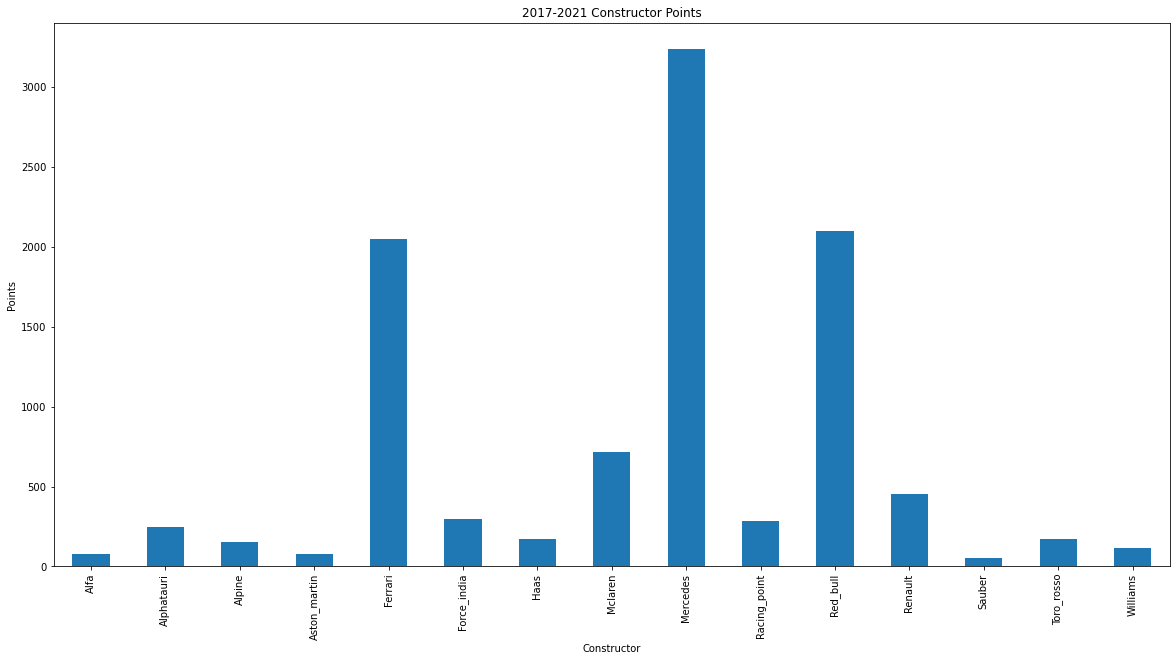

In [21]:
master_data.groupby('constructorRef').sum()['points'].plot.bar(figsize=(20,10))
plt.title('2017-2021 Constructor Points')
plt.xlabel('Constructor')
plt.ylabel('Points')
plt.show()

In [22]:
# Used GroupBy method to see which constructors have the most points from 2017-2021
driver_points = master_data.groupby('driver_name_full')['points'].sum()
driver_points.sort_values(ascending=False)

driver_name_full
Lewis Hamilton        1916.5
Valtteri Bottas       1320.0
Max Verstappen        1297.5
Sebastian Vettel       953.0
Daniel Ricciardo       657.0
Charles Leclerc        560.0
Sergio Pérez           529.0
Kimi Räikkönen         513.0
Carlos Sainz           471.5
Pierre Gasly           309.0
Lando Norris           306.0
Esteban Ocon           272.0
Alexander Albon        197.0
Lance Stroll           176.0
Nico Hülkenberg        159.0
Fernando Alonso        148.0
Kevin Magnussen         96.0
Romain Grosjean         75.0
Daniil Kvyat            74.0
Felipe Massa            43.0
Yuki Tsunoda            32.0
Stoffel Vandoorne       25.0
Antonio Giovinazzi      21.0
George Russell          19.0
Marcus Ericsson          9.0
Jolyon Palmer            8.0
Nicholas Latifi          7.0
Pascal Wehrlein          5.0
Brendon Hartley          4.0
Robert Kubica            1.0
Sergey Sirotkin          1.0
Pietro Fittipaldi        0.0
Paul di Resta            0.0
Jenson Button            0

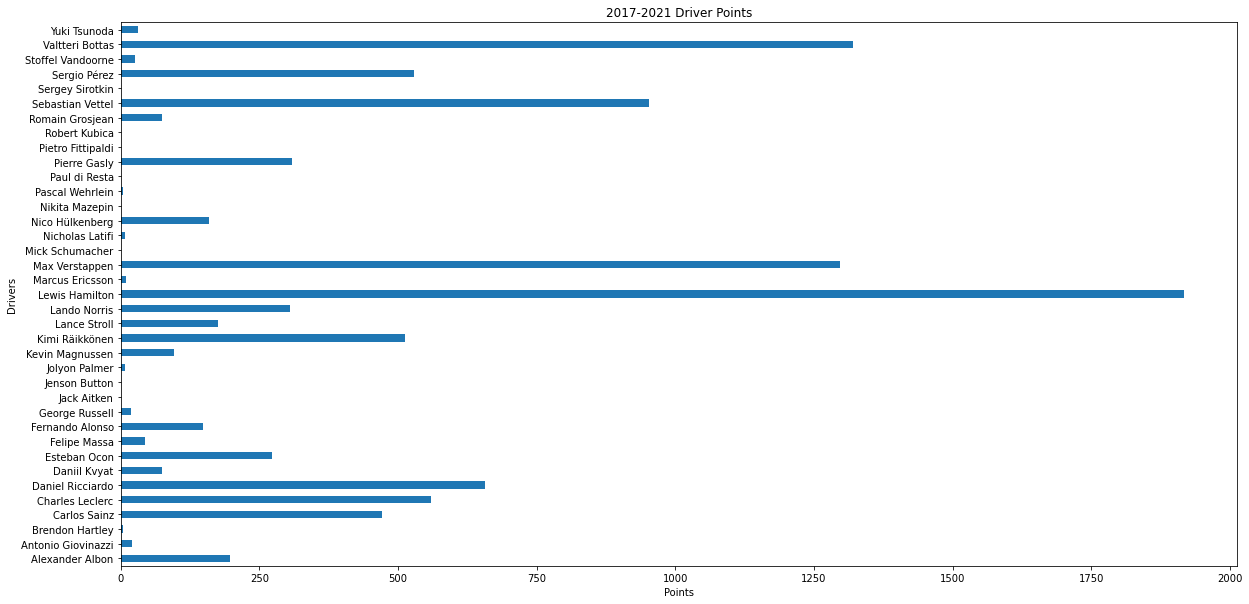

In [23]:
driver_points = master_data.groupby('driver_name_full').sum()['points'].plot.barh(figsize=(20,10))
plt.title('2017-2021 Driver Points')
plt.xlabel('Points')
plt.ylabel('Drivers')
plt.show()

In [24]:
#In order to calculate points per race we first must find out how many races each driver had between 2017-2021
races_per_driver = master_data.groupby('driver_name_full')['circuitId'].count()
races_per_driver.sort_values(ascending=False)

driver_name_full
Sebastian Vettel      101
Valtteri Bottas       101
Carlos Sainz          101
Daniel Ricciardo      101
Max Verstappen        101
Lewis Hamilton        100
Lance Stroll          100
Kimi Räikkönen         99
Sergio Pérez           99
Pierre Gasly           86
Charles Leclerc        81
Esteban Ocon           80
Kevin Magnussen        79
Romain Grosjean        77
Nico Hülkenberg        65
Fernando Alonso        62
Antonio Giovinazzi     62
George Russell         60
Lando Norris           60
Daniil Kvyat           53
Marcus Ericsson        41
Stoffel Vandoorne      41
Nicholas Latifi        39
Alexander Albon        38
Brendon Hartley        25
Robert Kubica          23
Mick Schumacher        22
Nikita Mazepin         22
Yuki Tsunoda           22
Sergey Sirotkin        21
Felipe Massa           19
Pascal Wehrlein        18
Jolyon Palmer          16
Pietro Fittipaldi       2
Jenson Button           1
Jack Aitken             1
Paul di Resta           1
Name: circuitId, dtyp

In [25]:
#As predicted Lewis Hamilton is leading the field in points per race, he averages a second place finish bewteen 2017-2022
points_per_race = master_data.groupby('driver_name_full')['points'].mean()
points_per_race.sort_values(ascending=False)

driver_name_full
Lewis Hamilton        19.165000
Valtteri Bottas       13.069307
Max Verstappen        12.846535
Sebastian Vettel       9.435644
Charles Leclerc        6.913580
Daniel Ricciardo       6.504950
Sergio Pérez           5.343434
Alexander Albon        5.184211
Kimi Räikkönen         5.181818
Lando Norris           5.100000
Carlos Sainz           4.668317
Pierre Gasly           3.593023
Esteban Ocon           3.400000
Nico Hülkenberg        2.446154
Fernando Alonso        2.387097
Felipe Massa           2.263158
Lance Stroll           1.760000
Yuki Tsunoda           1.454545
Daniil Kvyat           1.396226
Kevin Magnussen        1.215190
Romain Grosjean        0.974026
Stoffel Vandoorne      0.609756
Jolyon Palmer          0.500000
Antonio Giovinazzi     0.338710
George Russell         0.316667
Pascal Wehrlein        0.277778
Marcus Ericsson        0.219512
Nicholas Latifi        0.179487
Brendon Hartley        0.160000
Sergey Sirotkin        0.047619
Robert Kubica          

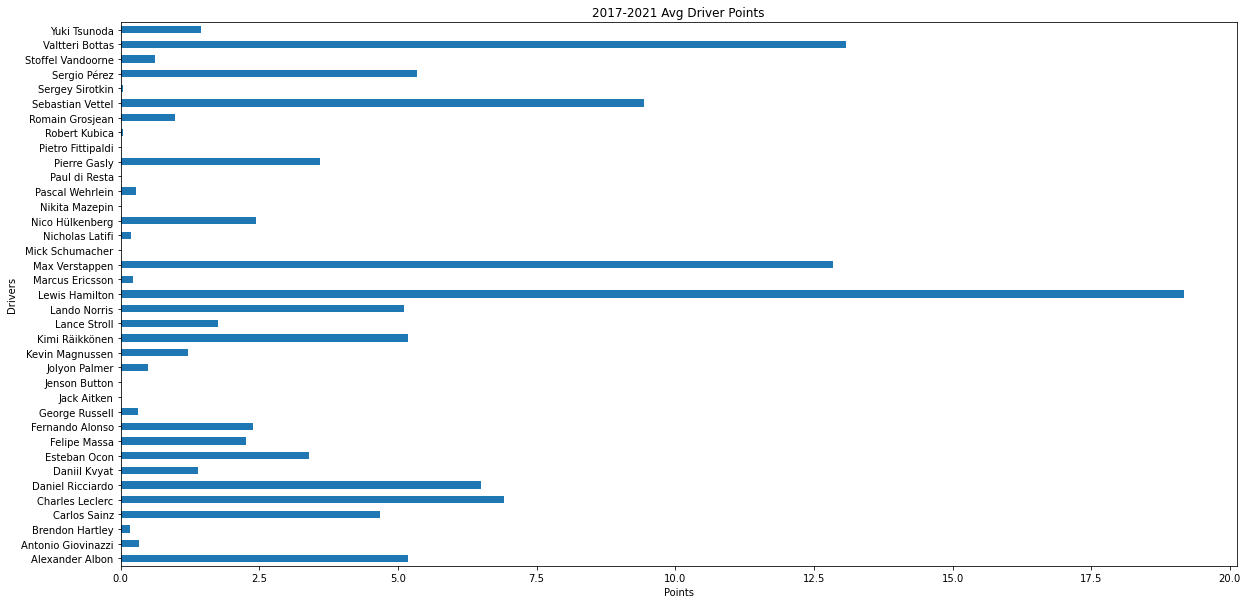

In [26]:
driver_points = master_data.groupby('driver_name_full').mean()['points'].plot.barh(figsize=(20,10))
plt.title('2017-2021 Avg Driver Points')
plt.xlabel('Points')
plt.ylabel('Drivers')
plt.show()

In [27]:
#Over 5 years what is the breakdown of drivers finishing the race & if not what has happened?
#In order to calculate points per race we first must find out how many races each driver had between 2017-2021
Status = master_data.groupby('status')['circuitId'].count()
Status.sort_values(ascending=False)
Races = master_data['circuitId'].count()
Status_percent = Status/Races*100
Status_percent.sort_values(ascending=False)

status
Finished            47.524752
+1 Lap              28.415842
+2 Laps              5.742574
Collision            3.910891
Engine               1.980198
Accident             1.881188
Brakes               1.287129
Collision damage     1.138614
Power Unit           0.940594
Gearbox              0.792079
+3 Laps              0.643564
Suspension           0.544554
Wheel                0.445545
Hydraulics           0.445545
Retired              0.396040
Power loss           0.346535
Disqualified         0.297030
Puncture             0.297030
Electrical           0.247525
Overheating          0.198020
Oil leak             0.198020
Exhaust              0.198020
Fuel pressure        0.148515
Battery              0.148515
Electronics          0.148515
Water pressure       0.148515
Damage               0.099010
Driveshaft           0.099010
Withdrew             0.099010
Mechanical           0.099010
Wheel nut            0.099010
Turbo                0.099010
Transmission         0.099010
Ill